In [2]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from numpy.linalg import norm, eig, eigh

(-0.5, 399.5, 399.5, -0.5)

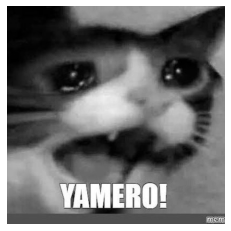

In [3]:
A = imread('image.jpg')
X = np.mean(A, -1)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')

In [4]:
print('Matrix image shape', A.shape)
print('After change to 2D space',X.shape)

Matrix image shape (400, 400, 3)
After change to 2D space (400, 400)


In [5]:
vv, V = eig(X.T@X)

In [6]:
sigma = np.sqrt(np.eye(X.shape[0], X.shape[1])*vv)

In [7]:
sigma

array([[4.26218098e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.25522184e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.85908084e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.47288155e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.77144479e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.62431482e-01]])

In [8]:
U = np.array([X@V[:,i]/norm(X@V[:,i]) for i in range(V.shape[0])]).T

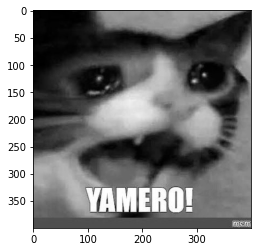

In [9]:
plt.imshow(U@sigma@V.T)
plt.set_cmap('gray')

In [10]:
sv = np.diag(sigma)

In [11]:
import plotly.express as px

In [12]:
fig = px.line(np.cumsum(sv)/sum(sv))
fig.show()

Text(0.5, 1.0, 'Reconstructed n = 44, 90%')

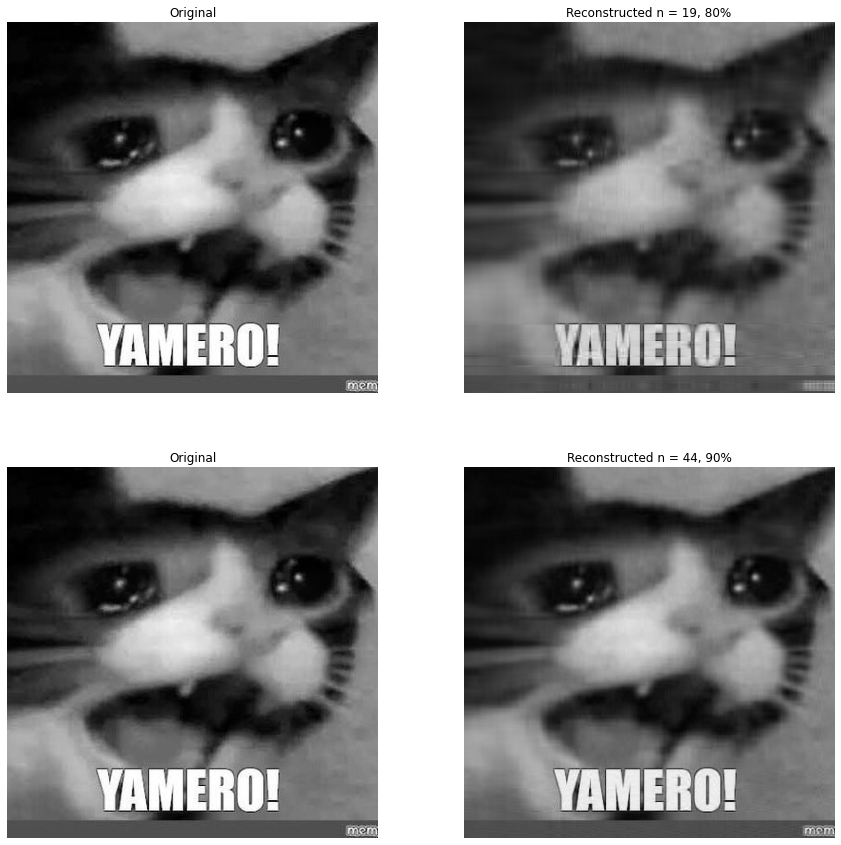

In [13]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))
k = [19,44]
ax[0,0].imshow(U@sigma@V.T)
ax[0,0].axis('off')
ax[0,0].set_title('Original')


ax[0,1].imshow(U[:,:k[0]]@sigma[:k[0],:k[0]]@V.T[:k[0],:])
ax[0,1].axis('off')
ax[0,1].set_title(f'Reconstructed n = {k[0]}, 80%')

ax[1,0].imshow(U@sigma@V.T)
ax[1,0].axis('off')
ax[1,0].set_title('Original')

ax[1,1].imshow(U[:,:k[1]]@sigma[:k[1],:k[1]]@V.T[:k[1],:])
ax[1,1].axis('off')
ax[1,1].set_title(f'Reconstructed n = {k[1]}, 90%')

Text(0.5, 1.0, 'Reconstructed n = 100, 96%')

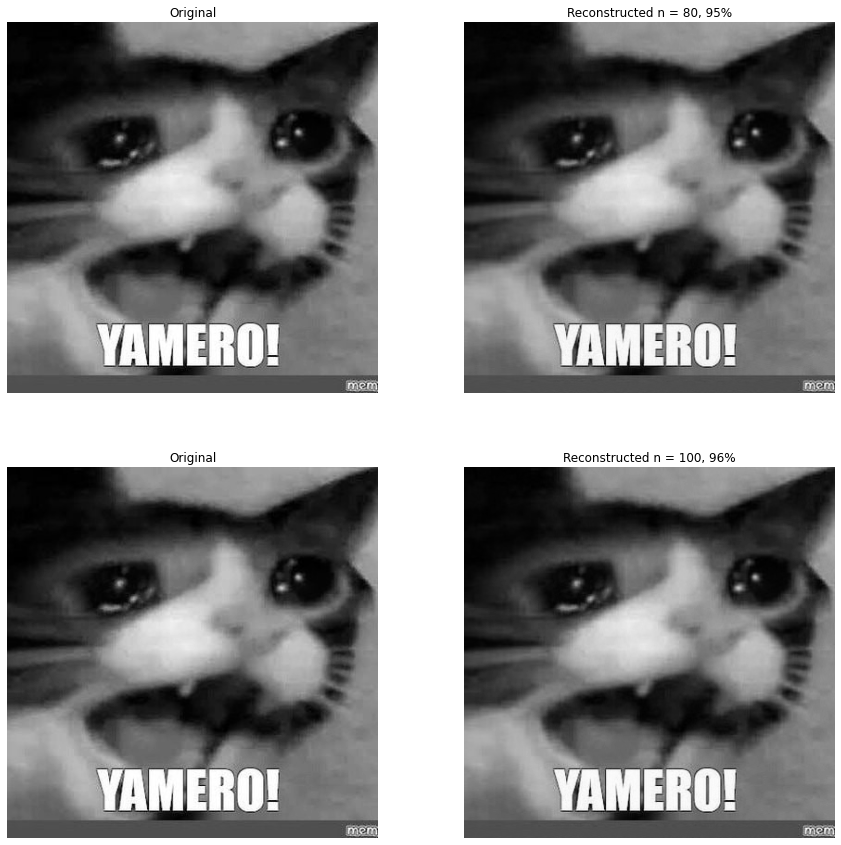

In [14]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))
k = [80, 100]
ax[0,0].imshow(U@sigma@V.T)
ax[0,0].axis('off')
ax[0,0].set_title('Original')


ax[0,1].imshow(U[:,:k[0]]@sigma[:k[0],:k[0]]@V.T[:k[0],:])
ax[0,1].axis('off')
ax[0,1].set_title(f'Reconstructed n = {k[0]}, 95%')

ax[1,0].imshow(U@sigma@V.T)
ax[1,0].axis('off')
ax[1,0].set_title('Original')

ax[1,1].imshow(U[:,:k[1]]@sigma[:k[1],:k[1]]@V.T[:k[1],:])
ax[1,1].axis('off')
ax[1,1].set_title(f'Reconstructed n = {k[1]}, 96%')